# 1. 赛题信息

- 数据：某信贷平台的贷款记录，总数据量超过120w，包含47列变量信息，其中15列为匿名变量，80万条作为训练集，20万条作为测试集A，20万条作为测试集B
- 任务：预测用户贷款是否违约，给出概率`isDefault`
- 特征说明：  
    - id	为贷款清单分配的唯一信用证标识
    - loanAmnt	贷款金额
    - term	贷款期限（year）
    - interestRate	贷款利率
    - installment	分期付款金额
    - grade	贷款等级
    - subGrade	贷款等级之子级
    - employmentTitle	就业职称
    - employmentLength	就业年限（年）
    - homeOwnership	借款人在登记时提供的房屋所有权状况
    - annualIncome	年收入
    - verificationStatus	验证状态
    - issueDate	贷款发放的月份
    - purpose	借款人在贷款申请时的贷款用途类别
    - postCode	借款人在贷款申请中提供的邮政编码的前3位数字
    - regionCode	地区编码
    - dti	债务收入比
    - delinquency_2years	借款人过去2年信用档案中逾期30天以上的违约事件数
    - ficoRangeLow	借款人在贷款发放时的fico所属的下限范围
    - ficoRangeHigh	借款人在贷款发放时的fico所属的上限范围
    - openAcc	借款人信用档案中未结信用额度的数量
    - pubRec	贬损公共记录的数量
    - pubRecBankruptcies	公开记录清除的数量
    - revolBal	信贷周转余额合计
    - revolUtil	循环额度利用率，或借款人使用的相对于所有可用循环信贷的信贷金额
    - totalAcc	借款人信用档案中当前的信用额度总数
    - initialListStatus	贷款的初始列表状态
    - applicationType	表明贷款是个人申请还是与两个共同借款人的联合申请
    - earliesCreditLine	借款人最早报告的信用额度开立的月份
    - title	借款人提供的贷款名称
    - policyCode	公开可用的策略_代码=1新产品不公开可用的策略_代码=2
    - n系列匿名特征	匿名特征n0-n14，为一些贷款人行为计数特征的处理
- 评测指标：**AUC**评估  

# 2. 预测指标小结
对分类问题中常见的预测指标进行总结说明，并给出相应样例代码
- [一篇不错的评测指标说明文](https://www.cnblogs.com/guoyaohua/p/classification-metrics.html)

## 2.1 混淆矩阵
用于二分类，将分类按照正负两类划分（如有病，没病），根据预测结果和实际结果是否相符定义几个指标：
- `TP`:预测为正，实际为正，P(positive)表示正，T(True)表示预测正确
- `FP`:预测为正，实际为负
- `TN`:预测为负，实际为负
- `FN`:预测为负，实际为正

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('混淆矩阵:\n',confusion_matrix(y_true, y_pred))

混淆矩阵:
 [[1 1]
 [1 1]]


## 2.2 准确率
正确划分正例和负例的比例

In [2]:
from sklearn.metrics import accuracy_score

y_pred = [0,1,0,1]
y_true = [0,1,1,1]
print('acc:', accuracy_score(y_true, y_pred))  # 0.75

acc: 0.75


## 2.3 精确率
正例预测正确的比例，适用于只关心正例的问题，例如疾病要尽量查出有病

In [4]:
from sklearn import metrics

y_pred = [0,1,0,0]
y_true = [0,1,1,1]
print('precision:',metrics.precision_score(y_true, y_pred))  # 1.0

precision: 1.0


## 2.4 召回率
正确预测正例占所有正例的比例，即有多少正例被检测出来，检测罪犯要高

In [5]:
from sklearn import metrics

y_pred = [0,1,0,0]
y_true = [0,1,1,1]
print('recall:',metrics.recall_score(y_true, y_pred))  # 0.5

recall: 0.3333333333333333


## 2.5 F1-score
同时考虑precision和recall两者的性能，用于全面地衡量分类正例的能力

In [6]:
from sklearn import metrics

y_pred = [0,1,0,0]
y_true = [0,1,1,1]
print('f1:',metrics.f1_score(y_true, y_pred))  # 0.667

f1: 0.5


## 2.6 PR曲线
以recall为横轴，precision为纵轴绘制的曲线，每一个点是选取了不同的划分阈值得到了不同的PR，通常我们对各个分类的判断是一个概率值，选择不同概率值作为划分边界（一般认为是0.5），样本被划分为正负的结果也不同，不段调整这个阈值，得到PR曲线。
- `sklearn.metrics.precision_recall_curve`：
    - input：
        - `y_ture`:二分类标签真实值，默认是`{-1,1}`或`{0,1}`，如果不是需要在`pos_label`中指定
        - `probas_pred`:各个样本分类为正例的概率，与`y_ture`对应，例如[0.5,0.2]表示第一个样本被分为正例（1）的概率是0.5
        - `pos_label`:二分类的标签，为None时，默认`{-1,1}`或`{0,1}`
    - return：
        - `precision`:按照不同概率阈值划分后得到的精度，长度是阈值个数+1，最后一个是1
        - `recall`:与precision对应，最后一个是0
        - `thresholds`:按照从小到大的顺序，对从第二个概率（因为>=阈值的视作正例，如果从第1个开始就所有的都是正例）开始分别进行PR的计算
    

P:[0.66666667 0.5        1.         1.        ]
R:[1.  0.5 0.5 0. ]
T:[0.35 0.4  0.8 ]


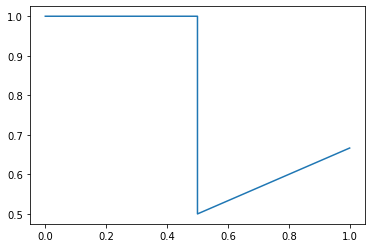

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
print('P:{}\nR:{}\nT:{}'.format(precision, recall, thresholds))
plt.plot(recall,precision)

## 2.7 ROC曲线
涉及到`TPR`,`FPR`两个新指标：
- `TPR（true positive rate）`：$\frac{TP}{TP+FN}$与recall相同，是所有预测正确预测为正例的样本占总正例样本的比例
- `FPR(false positive rate)`：$\frac{FP}{TN+FP}$被错误预测为正例的样本占所有负例样本的比例

与PR曲线类似，该曲线也采用不同阈值的方式得到不同的`TPR`,`FPR`，然后绘制曲线，该曲线永远在$y=x$上方
- `sklearn.metrics.roc_curve`:基本与`precision_recall_curve`相同，只是输入可以是概率，也可以是分数，返回`TPR`,`FPR`,`thresholds`
    - `FPR`:递增，以thresholds[i]作为阈值`>=thresholds[i]`的视为正例
    - `TPR`:递增
    - `thresholds`:递减，thresholds[0]被认定为没有样本被预测为正例，是`max(y_score)+1`,相当于`fpr,tpr`起点是`(0,0)`.

fpr:[0.  0.  0.5 0.5 1. ]
tpr:[0.  0.5 0.5 1.  1. ]
T:[1.8  0.8  0.4  0.35 0.1 ]


Text(0.5, 0, 'FPR')

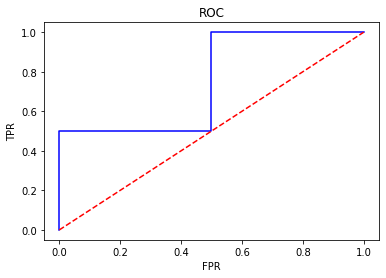

In [4]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

y_true = np.array([1, 1, 2, 2])
y_score = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score, pos_label=2)  # 指定pos_label

print('fpr:{}\ntpr:{}\nT:{}'.format(fpr, tpr, thresholds))
plt.title('ROC')
plt.plot(fpr, tpr,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

## 2.8 AUC面积
ROC曲线是越上凸越好，但需要一个定量值进行刻画，即AUC面积，它是ROC曲线与其下坐标轴围成的面积，面积越大，说明分类器性能越好，面积的计算采用积分

In [13]:
import numpy as np
from sklearn import metrics

y_true = np.array([0,0,1,1])
y_score = np.array([0.1,0.4,0.35,0.8])
print('AUC:',metrics.roc_auc_score(y_true, y_scores))  # 0.75

AUC: 0.75


## 2.9 KS指标-金融风控预测类常见指标
KS曲线与ROC曲线类似，但KS曲线将`TPR`,`FPR`均作为纵轴，横轴由选定的阈值担当。
$$KS=max(TPR-FPR)$$
一般来说，KS值越大，模型区分能力越强，但过大可能会存在异常（过拟合），下面是KS的取值对应模型能力（经验）

KS（%）|	好坏区分能力
---|---
20以下|	不建议采用
20-40	|较好
41-50	|良好
51-60	|很强
61-75	|非常强
75以上	|过于高，疑似存在问题

In [1]:
# KS 计算
from sklearn.metrics import roc_curve
import numpy as np

y_true = np.array([0,0,1,1])
y_score = np.array([0.1,0.4,0.35,0.8])
FPR,TPR,thresholds=roc_curve(y_true, y_score)
KS=abs(FPR-TPR).max()
print('KS值：',KS)

KS值： 0.5


# 3. 小结
- 了解赛题基本信息
- 参考借鉴其他比赛
- 确定评价指标，线下验证